### Q1

Create a *Gibbs sampler* that can be used for the sample `x = stats.norm(loc=m, scale=s).rvs(size=n)` for any arbitrary `n`, `m`, and `s`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

n = 30; m = 0; s = 1;
x = stats.norm(loc=m, scale=s).rvs(size=n)
C,G = 2,10000
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[0,0] = 1000
theta[1,0] = -1000
for c in range(C):
    for g in range(1,G):
        tau[c,g] = stats.gamma(a=n/2 + 1, scale=2/((x-theta[c, g-1])**2).sum()).rvs()
        theta[c,g] = stats.norm(loc=x.mean(), scale=1/(np.sqrt(tau[c, g]*n))).rvs()

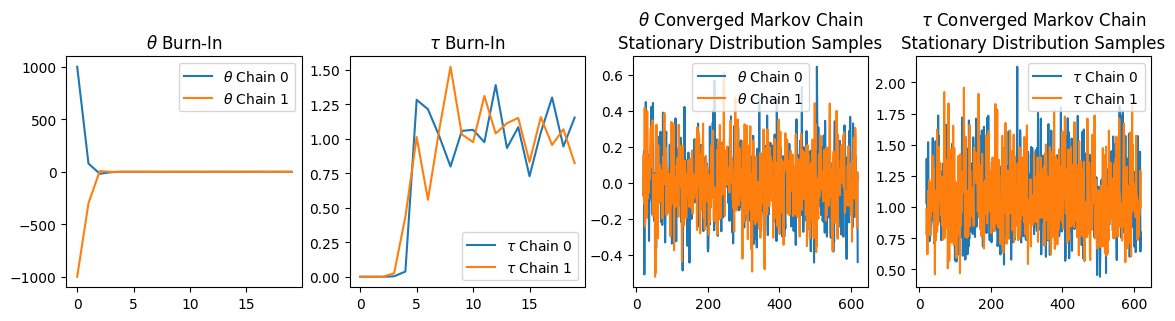

In [3]:
fig,ax = plt.subplots(1, 4, figsize=(14,3));
ax[0].set_title("$\\theta$ Burn-In");
ax[1].set_title("$\\tau$ Burn-In");
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples");
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 620
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();

 Provide a demonstration of Bayesian inference for this data and model specification.

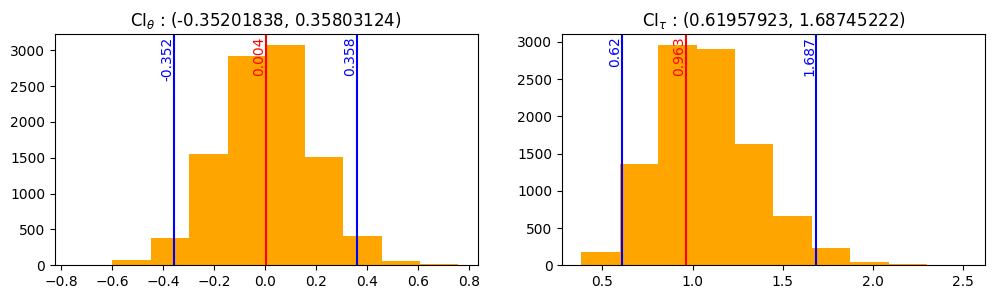

In [4]:
fig,ax = plt.subplots(1, 2, figsize=(12,3));
ci1 = np.quantile(theta[0, burn:], 0.025).round(8), np.quantile(theta[0, burn:], 0.975).round(8)
ci2 = np.quantile(tau[0, burn:], 0.025).round(8), np.quantile(tau[0, burn:], 0.975).round(8)
ax[0].set_title("$\\text{CI}_{\\theta}$ : " + str(ci1));
ax[1].set_title("$\\text{CI}_{\\tau}$ : " + str(ci2));

ax[0].hist(theta[0, burn:], color='orange')
ax[0].axvline(x.mean(), color='r')
ax[0].axvline(np.quantile(theta, 0.025), color='b')
ax[0].axvline(np.quantile(theta, 0.975), color='b')
ax[0].text(np.quantile(theta, 0.025), 0.99, np.quantile(theta[0, burn:], 0.025).round(3),
           color='b', ha='right', va='top', rotation=90, transform=ax[0].get_xaxis_transform())
ax[0].text(x.mean(), 0.99, x.mean().round(3),
           color='r', ha='right', va='top', rotation=90, transform=ax[0].get_xaxis_transform())
ax[0].text(np.quantile(theta, 0.975), 0.99, np.quantile(theta[0, burn:], 0.975).round(3),
           color='b', ha='right', va='top', rotation=90, transform=ax[0].get_xaxis_transform())

ax[1].hist(tau[0, burn:], color='orange')
ax[1].axvline(x.var(), color='r')
ax[1].axvline(np.quantile(tau, 0.025), color='b')
ax[1].axvline(np.quantile(tau, 0.975), color='b')
ax[1].text(np.quantile(tau, 0.025), 0.99, np.quantile(tau[0, burn:], 0.025).round(3),
           color='b', ha='right', va='top', rotation=90, transform=ax[1].get_xaxis_transform())
ax[1].text(x.var(), 0.99, x.var().round(3),
           color='r', ha='right', va='top', rotation=90, transform=ax[1].get_xaxis_transform())
ax[1].text(np.quantile(tau, 0.975), 0.99, np.quantile(tau[0, burn:], 0.975).round(3),
           color='b', ha='right', va='top', rotation=90, transform=ax[1].get_xaxis_transform())

ci1 = np.quantile(theta[0, burn:], 0.025), np.quantile(theta[0, burn:], 0.975)
ci2 = np.quantile(tau[0, burn:], 0.025), np.quantile(tau[0, burn:], 0.975)

### Q2

Considering $p(\theta) \sim \mathcal{N}(\theta_0, \tau_0) \propto \sqrt{\frac{\tau_0}{2 \pi}} e^{-\frac{\tau_0}{2}(\theta - \theta_0)^2}$ and $p(\tau) \propto \tau^{\frac{\alpha}{2} - 1} e^{-\frac{\lambda}{2}\tau}$, derive the full conditionals $p(\tau|\theta, \mathbf{x})$ and $p(\theta|\tau, \mathbf{x})$.

\begin{align*}
  p(\tau|\theta, \mathbf{x}) &\propto f(\mathbf{x}|\theta)p(\tau)\\
  &\propto \prod^{n}_{i = 1} \sqrt{\frac{\tau}{2 \pi}} e^{-\frac{\tau}{2}(x_i - \theta)^2} \times \tau^{\frac{\alpha}{2} - 1} e^{-\frac{\lambda}{2}\tau}\\
  &\propto \tau^{n \left(\frac{1}{2} + \frac{\alpha}{2} - 1\right)} e^{-\frac{\tau}{2} \sum^{n}_{i = 1}(x_i - \theta)^2} e^{-\frac{n\lambda}{2}\tau}\\
  &\propto \tau^{\frac{n(\alpha - 1)}{2}} e^{-\frac{\tau}{2} \left[ n\lambda + \sum^{n}_{i = 1}(x_i - \theta)^2 \right]}\\
  \textstyle \therefore \tau &\sim \text{Gamma} \left( \alpha = \frac{n(\alpha - 1)}{2} + 1, \text{SCALE} = \left( \frac{1}{2} \left[ n\lambda + \sum^{n}_{i = 1}(x_i - \theta)^2 \right] \right)^{-1} \right)\\
  p(\theta|\tau, \mathbf{x}) &\propto f(\mathbf{x}|\tau)p(\theta)\\
  &\propto \prod^{n}_{i = 1} \sqrt{\frac{\tau}{2 \pi}} e^{-\frac{\tau}{2}(x_i - \theta)^2} \times \sqrt{\frac{\tau_0}{2 \pi}} e^{-\frac{\tau_0}{2}(\theta - \theta_0)^2}\\
  &\propto e^{-\frac{\tau}{2} \sum^{n}_{i = 1} (x_i - \theta)^2} e^{-\frac{\tau_0}{2}(\theta - \theta_0)^2}\\
  &\propto \text{exp} \left\{ -\frac{\tau}{2} \left[ \sum^{n}_{i = 1} (\theta^2 - 2x_i\theta) \right] -\frac{\tau_0}{2}(\theta - \theta_0)^2\right\}\\
  &\propto \text{exp} \left\{ -\frac{\tau}{2} \left[ n\theta^2 - 2n\bar{x}\theta \right] -\frac{\tau_0}{2} \left[ \theta^2 - \theta\theta_0 \right] \right\}\\
  &= \text{exp} \left\{ -\frac{1}{2} \left[ n\tau\theta^2 - 2n\bar{x}\tau\theta + \tau_0\theta^2 - 2\tau_0\theta\theta_0 \right] \right\}\\
  &= \text{exp} \left\{ -\frac{1}{2} \left[ \theta^2 (n\tau + \tau_0) - 2\theta (n\bar{x}\tau + \tau_0\theta_0) \right] \right\}\\
  &= \text{exp} \left\{ -\frac{n\tau + \tau_0}{2} \left[ \theta^2 - 2\theta \left( \frac{n\bar{x}\tau + \tau_0\theta_0}{n\tau + \tau_0} \right) \right] \right\}\\
  &\propto \text{exp} \left\{ -\frac{n\tau + \tau_0}{2} \left[ \theta^2 - 2\theta \left( \frac{n\bar{x}\tau + \tau_0\theta_0}{n\tau + \tau_0} \right) + \left( \frac{n\bar{x}\tau + \tau_0\theta_0}{n\tau + \tau_0} \right)^2 \right] \right\}\\
  &= \text{exp} \left\{ -\frac{n\tau + \tau_0}{2}
  \left( \theta - \frac{n\bar{x}\tau + \tau_0\theta_0}{n\tau + \tau_0} \right)^2 \right\}\\
  &\propto \sqrt{\frac{n\tau + \tau_0}{2 \pi}} e^{ -\frac{n\tau + \tau_0}{2} \left( \theta - \frac{n\bar{x}\tau + \tau_0\theta_0}{n\tau + \tau_0} \right)^2}\\
  \theta &\sim \mathcal{N} \left( \frac{n\bar{x}\tau + \tau_0\theta_0}{n\tau + \tau_0} , (n\tau + \tau_0)^{-1} \right)
\end{align*}

Explain how to equate $\alpha$ and $\lambda$ with controlling the amount and nature of information the prior contributes to the posterior. How can we interpret these as controlling a "number of data points" contributed by the prior relative to the number of data points contributed to the posterior through the likelihoood?

- The shape parameter $\frac{\alpha}{2}$ controls how much prior data contributes to the estimate of $\tau$. A higher $\alpha$ increases the weight of the prior, making it more influential, being able to contribute *more* data points. On the other hand, the rate parameter $\frac{\lambda}{2}$ determines the scale of $\tau$. Larger $\lambda$ means we expect $\tau$ to be smaller (more regularization).

Create an updated version of the *Gibbs sampler* for $N(\theta_0, \tau^2_0)$ and $\textrm{gamma}(\textrm{shape}=\frac{\alpha}{2}, \textrm{rate}=\frac{\lambda}{2})$ priors for $p(\theta)$ and $p(\tau)$ respectively. Demonstrate how changing the prior hyperparameters influences the posterior relative to the sample and the likelihood.

In [19]:
n = 30; m = 0; s = 1;
x = stats.norm(loc=m, scale=s).rvs(size=n)
C,G = 2,10000
# hyperparamaters
prior_combinations = [
    {"alpha": 2, "lambda": 2, "theta_0": 0, "tau_0": 1, "label": "Weak Prior"},
    {"alpha": 10, "lambda": 10, "theta_0": 0, "tau_0": 5, "label": "Strong Prior"},
    {"alpha": 2, "lambda": 0.5, "theta_0": 5, "tau_0": 1, "label": "Biased Prior"}
]
samples_theta, samples_tau = [], []
for idx, priors in enumerate(prior_combinations):
    alpha, lambda_, theta_0, tau_0 = priors["alpha"], priors["lambda"], priors["theta_0"], priors["tau_0"]
    theta, tau = np.zeros([C, G]), np.zeros([C, G])
    theta[:, 0] = 1000  # Initial guess
    for c in range(C):
        for g in range(1, G):
            shape = (n * (alpha - 1)) / 2 + 1
            scale = 2 / (n * lambda_ + ((x - theta[c, g-1])**2).sum())
            tau[c, g] = stats.gamma.rvs(a=shape, scale=scale)
            mean_theta = (n * x.mean() * tau[c, g] + tau_0 * theta_0) / (n * tau[c, g] + tau_0)
            std_theta = 1 / np.sqrt((n * tau[c, g] + tau_0))
            theta[c, g] = stats.norm.rvs(loc=mean_theta, scale=std_theta)
    samples_theta.append(theta[:, 20:].flatten())
    samples_tau.append(tau[:, 20:].flatten())

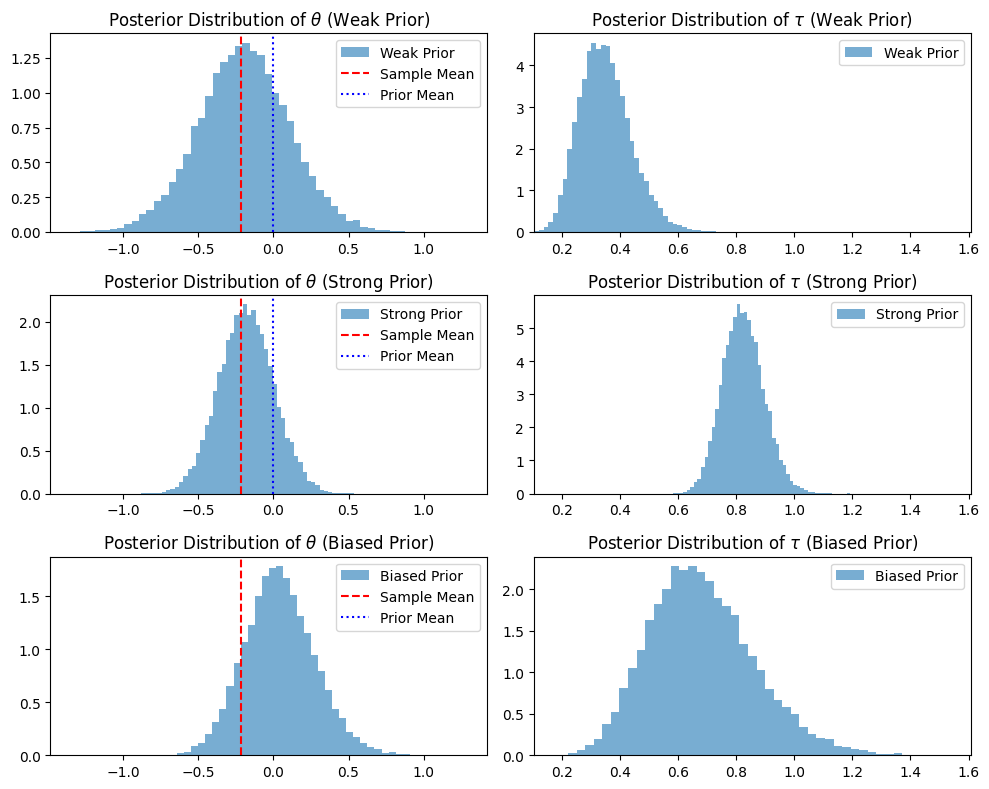

In [21]:
theta_min, theta_max = min(map(np.min, samples_theta)), max(map(np.max, samples_theta))
tau_min, tau_max = min(map(np.min, samples_tau)), max(map(np.max, samples_tau))
fig, axes = plt.subplots(len(prior_combinations), 2, figsize=(10, 8))
for idx, priors in enumerate(prior_combinations):
    label = priors["label"]

    # Plot posterior samples of theta
    axes[idx, 0].hist(samples_theta[idx], bins=50, density=True, alpha=0.6, label=label)
    axes[idx, 0].axvline(np.mean(x), color="red", linestyle="--", label="Sample Mean")
    axes[idx, 0].axvline(priors["theta_0"], color="blue", linestyle=":", label="Prior Mean")
    axes[idx, 0].set_xlim(theta_min, theta_max)
    axes[idx, 0].set_title(f"Posterior Distribution of $\\theta$ ({label})")
    axes[idx, 0].legend()

    # Plot posterior samples of tau
    axes[idx, 1].hist(samples_tau[idx], bins=50, density=True, alpha=0.6, label=label)
    axes[idx, 1].set_xlim(tau_min, tau_max)
    axes[idx, 1].set_title(f"Posterior Distribution of $\\tau$ ({label})")
    axes[idx, 1].legend()

plt.tight_layout()
plt.show()

### Q3

Find the multinomial-Dirichlet posterior similar to how it was done at the bottom of Q3, <br> **or**, <br>re-state this part in your own words: *If the prior is a proper distribution then the posterior is proportional to the joint distribution as Bayes Theorem tells us and describe how one might therefore identify the exact distribution of the posterior by just looking at the joint but that finally all this is moot and beside the point because as Bayesians we're going to trade any functional forms of distributions for samples from those distributions to just make histograms and belief (credible interval probability) statements based on those anyway...*

We answer both of these queries with the following derivation.
We know that:
\begin{align*}
  p(\mathbf{x} | \boldsymbol{\theta}) &= \frac{n!}{x_1! x_2! \dots x_k!} \prod_{i=1}^{k} \theta_i^{x_i}\\
  p(\boldsymbol{\theta}) &= \frac{1}{B(\boldsymbol{\alpha})} \prod_{i=1}^{k} \theta_i^{\alpha_i - 1} \tag*{$\left( \text{where } B(\boldsymbol{\alpha}) = \frac{\prod_{i=1}^{k} \Gamma(\alpha_i)}{\Gamma(\sum_{i=1}^{k} \alpha_i)} \right)$}
\end{align*}

Now, we can compute the marginal likelihood like such:
\begin{align*}
  p(\mathbf{x}) &= \int p(\mathbf{x} | \boldsymbol{\theta}) p(\boldsymbol{\theta}) d\boldsymbol{\theta} \\
  &= \int \left( \frac{n!}{x_1! x_2! \dots x_k!} \prod_{i=1}^{k} \theta_i^{x_i} \right) \left( \frac{1}{B(\boldsymbol{\alpha})} \prod_{i=1}^{k} \theta_i^{\alpha_i - 1} \right) d\boldsymbol{\theta} \\
  &= \frac{n!}{x_1! x_2! \dots x_k!} \frac{1}{B(\boldsymbol{\alpha})} \int \prod_{i=1}^{k} \theta_i^{x_i + \alpha_i - 1} d\boldsymbol{\theta}\\
  &= \frac{n!}{x_1! x_2! \dots x_k!} \frac{1}{B(\boldsymbol{\alpha})} \underbrace{\int \prod_{i=1}^{k} \theta_i^{(\alpha_i + x_i) - 1} d\boldsymbol{\theta}}_{B(\boldsymbol{\alpha} + \mathbf{x})}\\
  &= \frac{n!}{x_1! x_2! \dots x_k!} \frac{B(\boldsymbol{\alpha} + \mathbf{x})}{B(\boldsymbol{\alpha})} \tag*{$\left( \text{where } B(\boldsymbol{\alpha} + \mathbf{x}) \equiv B(\alpha_1 + x_1, \cdots, \alpha_k + x_k) \right)$}
\end{align*}
We can now use Bayes' theorem:
\begin{align*}
  p(\boldsymbol{\theta} | \mathbf{x}) &= \frac{p(\mathbf{x} | \boldsymbol{\theta}) p(\boldsymbol{\theta})}{p(\mathbf{x})}\\
  &= \frac{n!}{x_1! x_2! \dots x_k!} \prod_{i=1}^{k} \theta_i^{x_i} \cdot \frac{1}{B(\boldsymbol{\alpha})} \prod_{i=1}^{k} \theta_i^{\alpha_i - 1} \cdot \left( \frac{n!}{x_1! x_2! \dots x_k!} \frac{B(\boldsymbol{\alpha} + \mathbf{x})}{B(\boldsymbol{\alpha})} \right)^{-1}\\
  &= \frac{\prod_{i=1}^{k} \theta_i^{(\alpha_i + x_i) - 1}}{B(\boldsymbol{\alpha} + \mathbf{x})}
\end{align*}
We can see that this is the density of a Dirichlet distribution: $\boldsymbol{\theta} | \mathbf{x} \sim \text{Dirichlet}(\alpha_1 + x_1, \alpha_2 + x_2, \dots, \alpha_k + x_k)$.

Thus, we have proved using integration that the posterior distribution follows a Dirichlet distribution with updated parameters. But note that we could have derove the entire thing *WITHOUT* those pesky normalizing constants because they were canceled out in the end anyway, making our whole effort of employing normalizing constants to derive our full posterior with a full likelihood, full prior, and full marginal likelihood, fruitless and empty.